In [31]:
import cv2
import matplotlib
import matplotlib.figure as figure
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

## Helper functions

In [38]:
# From https://www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/
# def order_points(pts):
#     # initialzie a list of coordinates that will be ordered
#     # such that the first entry in the list is the top-left,
#     # the second entry is the top-right, the third is the
#     # bottom-right, and the fourth is the bottom-left
#     rect = np.zeros((4, 2), dtype = "float32")
 
#     # the top-left point will have the smallest sum, whereas
#     # the bottom-right point will have the largest sum
#     s = pts.sum(axis = 1)
#     rect[0] = pts[np.argmin(s)]
#     rect[2] = pts[np.argmax(s)]
 
#     # now, compute the difference between the points, the
#     # top-right point will have the smallest difference,
#     # whereas the bottom-left will have the largest difference
#     diff = np.diff(pts, axis = 1)
#     rect[1] = pts[np.argmin(diff)]
#     rect[3] = pts[np.argmax(diff)]
 
#     # return the ordered coordinates
#     return rect

In [74]:
def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    #rect = order_points(pts)
    #(tl, tr, br, bl) = rect
    
    # Assume already ordered.  I'm seeing bugs with order_points.
    rect = pts
    (tl, tr, br, bl) = rect
    
 
    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
 
    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
 
    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    
    print("dst:{}".format(dst))
 
    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
 
    # return the warped image
    return warped

In [65]:
def warp(img, src_pts, dest_pts):
    
    img_size = (img.shape[1], img.shape[0])
    
    M = cv2.getPerspectiveTransform(src_pts, dest_pts)

    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

## Road Image

(1280, 720)


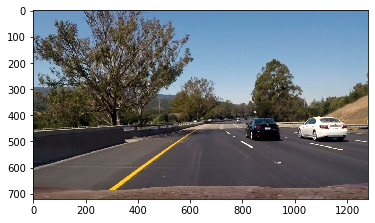

In [110]:
img = mpimg.imread("test_images/test6.jpg")
img_size = (img.shape[1], img.shape[0])
print(img_size)
imgplot = plt.imshow(img)
imgplot.set_cmap('nipy_spectral')

## Road Image source points

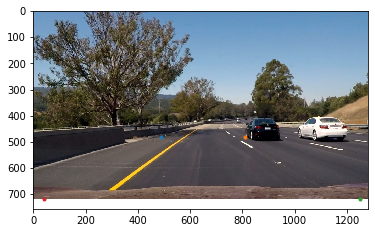

In [124]:
plt.imshow(img)
# src_pts = np.array(
#     [[625, 438], # top left
#     [742, 435],  # top right
#     [1276, 603], # bottom right
#     [0, 603]],   # bottom left
#     dtype = "float32"
# )

src_pts = np.array(
    [[490, 482], # top left
    [810, 482],  # top right
    [1250, 720], # bottom right
    [40, 720]],   # bottom left
    dtype = "float32"
)

for src_pt in src_pts:
    plt.plot(src_pt[0], src_pt[1], ".")

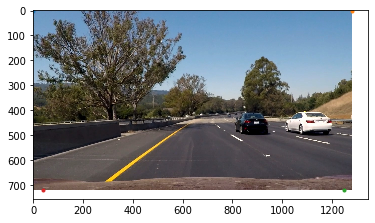

In [125]:
# dest_pts = np.array(
#     [[0, 0],
#     [1276, 0],
#     [1276, 720],
#     [0, 720]],
#     dtype = "float32"
# )

dest_pts = np.array(
    [[0, 0],
    [1280, 0],
    [1250, 720],
    [40, 720]],
    dtype = "float32"
)

plt.imshow(img)
for dest_pt in dest_pts:
    plt.plot(dest_pt[0], dest_pt[1], ".")

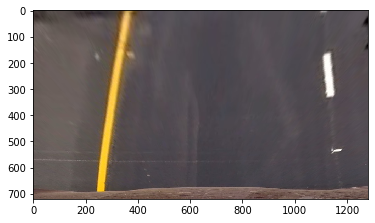

In [126]:
M = cv2.getPerspectiveTransform(src_pts, dest_pts)
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
plt.imshow(warped)

In [75]:




print(src_pts)
warped = warp(img, src_pts, dest_pts)

warped2 = four_point_transform(img, src_pts)


[[ 625.  438.]
 [ 742.  435.]
 [1276.  603.]
 [   0.  603.]]
dst:[[   0.    0.]
 [1275.    0.]
 [1275.  645.]
 [   0.  645.]]


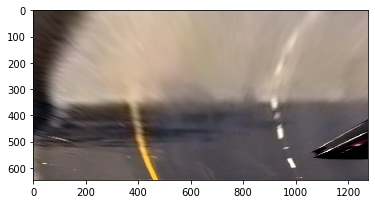

In [76]:
plt.imshow(warped2)

## Stop Sign

In [2]:
!ls test_images

stop_sign.jpg       straight_lines2.jpg test3.jpg           test6.jpg
stop_sign.png       test1.jpg           test4.jpg
straight_lines1.jpg test2.jpg           test5.jpg


In [90]:
img = mpimg.imread("test_images/stop_sign.png")

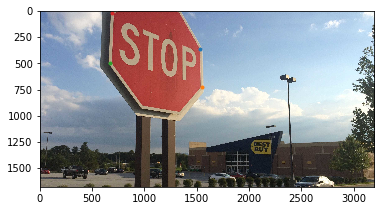

In [91]:
plt.imshow(img)
plt.plot(1537, 364, ".") # top right
plt.plot(1548, 730, ".") # bottom right
plt.plot(671, 493, ".") # bottom left
plt.plot(690, 23, ".")  # top left

In [94]:
def warp(img):
    
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32(
        [
            [1537, 364],
            [1548, 730],
            [671, 493],
            [690, 23],
        ]
    )

#     dst = np.float32(
#        [
#            [1676, 21],
#            [1676, 508],
#            [685, 501],
#            [685, 19],
#        ]
#     )
    dst = np.float32(
        [
            [3080, 184],
            [3080, 1552],
            [232, 1550],
            [232, 180],
        ]
    )
    
    M = cv2.getPerspectiveTransform(src, dst)

    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

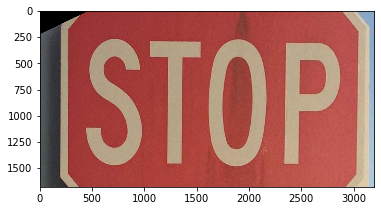

In [95]:
warped = warp(img)
plt.imshow(warped)